In [1]:
## 10 인공 신경망 소개 ##
import tensorflow as tf

## GPU 메모리 관리 ##
#1번 방법
config = tf.ConfigProto()
config.gpu_options.allow_growth = True #메모리 수요에 따라 할당

'''주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. 

Tensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'''

'주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. \n\nTensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'

In [6]:
## 10.1.3 퍼셉트론 ##
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] #꽃잎의 길이와 너비
Y = (iris.target == 0).astype(np.int) #Iris Setosa 인가?

per_clf = Perceptron(random_state=42) #데이터 섞어서 훈련
per_clf.fit(X, Y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

#퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임계값을 기준으로 예측

array([1])

<h2><b>활성화 함수</b></h2>

![activation](img/activation.png)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

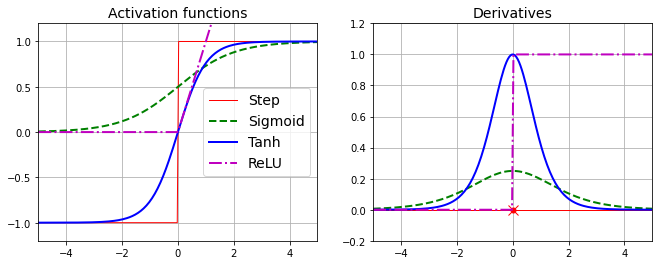

In [16]:
from matplotlib import pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [18]:
## 10.2 텐서플로의 고수준 API로 다층 퍼셉트론 훈련하기 ##
# MNIST Dataset Load!
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
Y_train = Y_train.astype(np.int32)
Y_test = Y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]

In [41]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    #정수 또는 실수로 된 특성을 매핑하기 위한 FeatureColumn 객체 생성, 실수값으로 된 열을 만들어 줌
dnn_clf1 = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, #1번 은닉층 300개 뉴런, 2층 은닉층 100개 뉴런, 출력 10개
                                         feature_columns=feature_cols, model_dir="model_dir")
dnn_clf1 = tf.contrib.learn.SKCompat(dnn_clf1) #sklearn인터페이스와 호환되게 SKCompat으로 형변환
dnn_clf1.fit(X_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002258A648A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'model_dir', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir\model.ckpt-800

INFO:tensorflow:global_step/sec: 624.199
INFO:tensorflow:loss = 0.00017168319, step = 86900 (0.161 sec)
INFO:tensorflow:global_step/sec: 601.552
INFO:tensorflow:loss = 0.00027600946, step = 87000 (0.166 sec)
INFO:tensorflow:global_step/sec: 607.617
INFO:tensorflow:loss = 8.78362e-05, step = 87100 (0.164 sec)
INFO:tensorflow:global_step/sec: 605.457
INFO:tensorflow:loss = 0.0004095458, step = 87200 (0.165 sec)
INFO:tensorflow:global_step/sec: 608.587
INFO:tensorflow:loss = 0.00017523447, step = 87300 (0.165 sec)
INFO:tensorflow:global_step/sec: 593.239
INFO:tensorflow:loss = 6.827275e-05, step = 87400 (0.168 sec)
INFO:tensorflow:global_step/sec: 609.68
INFO:tensorflow:loss = 0.00016199776, step = 87500 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.922
INFO:tensorflow:loss = 0.0002594662, step = 87600 (0.161 sec)
INFO:tensorflow:global_step/sec: 619.438
INFO:tensorflow:loss = 0.00022610024, step = 87700 (0.161 sec)
INFO:tensorflow:global_step/sec: 603.855
INFO:tensorflow:loss = 0.0001

INFO:tensorflow:loss = 5.1883013e-05, step = 94800 (0.172 sec)
INFO:tensorflow:global_step/sec: 573.627
INFO:tensorflow:loss = 0.00017714272, step = 94900 (0.174 sec)
INFO:tensorflow:global_step/sec: 584.199
INFO:tensorflow:loss = 5.253074e-05, step = 95000 (0.171 sec)
INFO:tensorflow:global_step/sec: 604.339
INFO:tensorflow:loss = 0.000110546, step = 95100 (0.164 sec)
INFO:tensorflow:global_step/sec: 617.215
INFO:tensorflow:loss = 8.047533e-05, step = 95200 (0.163 sec)
INFO:tensorflow:global_step/sec: 605.945
INFO:tensorflow:loss = 0.00011948494, step = 95300 (0.164 sec)
INFO:tensorflow:global_step/sec: 602.368
INFO:tensorflow:loss = 7.373747e-05, step = 95400 (0.167 sec)
INFO:tensorflow:global_step/sec: 609.666
INFO:tensorflow:loss = 0.00027516653, step = 95500 (0.164 sec)
INFO:tensorflow:global_step/sec: 617.247
INFO:tensorflow:loss = 0.00019590929, step = 95600 (0.161 sec)
INFO:tensorflow:global_step/sec: 609.657
INFO:tensorflow:loss = 0.0003278116, step = 95700 (0.165 sec)
INFO:te

INFO:tensorflow:loss = 5.9237085e-05, step = 102700 (0.163 sec)
INFO:tensorflow:global_step/sec: 595.62
INFO:tensorflow:loss = 0.00010368465, step = 102800 (0.167 sec)
INFO:tensorflow:global_step/sec: 606.008
INFO:tensorflow:loss = 0.00021214812, step = 102900 (0.166 sec)
INFO:tensorflow:global_step/sec: 578.415
INFO:tensorflow:loss = 9.0785485e-05, step = 103000 (0.172 sec)
INFO:tensorflow:global_step/sec: 594.859
INFO:tensorflow:loss = 0.00036213928, step = 103100 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.335
INFO:tensorflow:loss = 0.00017564041, step = 103200 (0.168 sec)
INFO:tensorflow:global_step/sec: 565.112
INFO:tensorflow:loss = 0.00026069177, step = 103300 (0.176 sec)
INFO:tensorflow:global_step/sec: 574.639
INFO:tensorflow:loss = 6.155718e-05, step = 103400 (0.174 sec)
INFO:tensorflow:global_step/sec: 568.102
INFO:tensorflow:loss = 0.00010937137, step = 103500 (0.177 sec)
INFO:tensorflow:global_step/sec: 577.964
INFO:tensorflow:loss = 6.5514505e-05, step = 103600 (0.17

INFO:tensorflow:global_step/sec: 574.699
INFO:tensorflow:loss = 0.0002051945, step = 110600 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.883
INFO:tensorflow:loss = 0.00010569586, step = 110700 (0.175 sec)
INFO:tensorflow:global_step/sec: 578.481
INFO:tensorflow:loss = 0.00016066598, step = 110800 (0.172 sec)
INFO:tensorflow:global_step/sec: 598.213
INFO:tensorflow:loss = 0.00024072222, step = 110900 (0.168 sec)
INFO:tensorflow:global_step/sec: 579.993
INFO:tensorflow:loss = 0.00017104708, step = 111000 (0.172 sec)
INFO:tensorflow:global_step/sec: 594.115
INFO:tensorflow:loss = 0.00010169168, step = 111100 (0.168 sec)
INFO:tensorflow:global_step/sec: 578.95
INFO:tensorflow:loss = 9.448439e-05, step = 111200 (0.173 sec)
INFO:tensorflow:global_step/sec: 583.053
INFO:tensorflow:loss = 0.0001090907, step = 111300 (0.172 sec)
INFO:tensorflow:global_step/sec: 534.549
INFO:tensorflow:loss = 0.00016318033, step = 111400 (0.187 sec)
INFO:tensorflow:global_step/sec: 526.885
INFO:tensorflow:lo

INFO:tensorflow:loss = 5.698798e-05, step = 118400 (0.163 sec)
INFO:tensorflow:global_step/sec: 568.444
INFO:tensorflow:loss = 0.000112353504, step = 118500 (0.175 sec)
INFO:tensorflow:global_step/sec: 525.916
INFO:tensorflow:loss = 0.00017466437, step = 118600 (0.191 sec)
INFO:tensorflow:global_step/sec: 545.165
INFO:tensorflow:loss = 0.0001455958, step = 118700 (0.183 sec)
INFO:tensorflow:global_step/sec: 603.843
INFO:tensorflow:loss = 1.3083066e-05, step = 118800 (0.166 sec)
INFO:tensorflow:global_step/sec: 602.33
INFO:tensorflow:loss = 0.00025585984, step = 118900 (0.166 sec)
INFO:tensorflow:global_step/sec: 574.669
INFO:tensorflow:loss = 2.3271778e-05, step = 119000 (0.174 sec)
INFO:tensorflow:global_step/sec: 609.697
INFO:tensorflow:loss = 0.00011431094, step = 119100 (0.164 sec)
INFO:tensorflow:global_step/sec: 555.452
INFO:tensorflow:loss = 9.737717e-05, step = 119200 (0.180 sec)
INFO:tensorflow:global_step/sec: 547.476
INFO:tensorflow:loss = 4.7695452e-05, step = 119300 (0.182

SKCompat()

In [44]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf1.predict(X_test)
accuracy_score(Y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir\model.ckpt-120000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9825

In [6]:
##위와 동일한 코드##
# TF Estimator
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf2 = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                     feature_columns=feature_cols)

# input function
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=Y_train, num_epochs=40, batch_size=50, shuffle=True)

# training
dnn_clf2.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\UNS\\AppData\\Local\\Temp\\tmpfmfy1i6q', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F6251B9748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for up

INFO:tensorflow:loss = 0.68062484, step = 4000 (0.239 sec)
INFO:tensorflow:global_step/sec: 414.328
INFO:tensorflow:loss = 3.0368943, step = 4100 (0.241 sec)
INFO:tensorflow:global_step/sec: 416.047
INFO:tensorflow:loss = 0.37514895, step = 4200 (0.241 sec)
INFO:tensorflow:global_step/sec: 410.932
INFO:tensorflow:loss = 1.0493339, step = 4300 (0.244 sec)
INFO:tensorflow:global_step/sec: 419.531
INFO:tensorflow:loss = 0.077024624, step = 4400 (0.237 sec)
INFO:tensorflow:global_step/sec: 426.668
INFO:tensorflow:loss = 4.3600154, step = 4500 (0.234 sec)
INFO:tensorflow:global_step/sec: 432.185
INFO:tensorflow:loss = 0.53093684, step = 4600 (0.231 sec)
INFO:tensorflow:global_step/sec: 421.294
INFO:tensorflow:loss = 2.343152, step = 4700 (0.237 sec)
INFO:tensorflow:global_step/sec: 424.861
INFO:tensorflow:loss = 0.59025186, step = 4800 (0.235 sec)
INFO:tensorflow:global_step/sec: 443.659
INFO:tensorflow:loss = 1.2657188, step = 4900 (0.226 sec)
INFO:tensorflow:global_step/sec: 426.673
INFO:

INFO:tensorflow:global_step/sec: 437.849
INFO:tensorflow:loss = 1.085474, step = 12300 (0.228 sec)
INFO:tensorflow:global_step/sec: 437.849
INFO:tensorflow:loss = 0.88964367, step = 12400 (0.228 sec)
INFO:tensorflow:global_step/sec: 447.623
INFO:tensorflow:loss = 0.13487837, step = 12500 (0.224 sec)
INFO:tensorflow:global_step/sec: 447.622
INFO:tensorflow:loss = 0.10724902, step = 12600 (0.223 sec)
INFO:tensorflow:global_step/sec: 437.848
INFO:tensorflow:loss = 0.24894898, step = 12700 (0.227 sec)
INFO:tensorflow:global_step/sec: 443.662
INFO:tensorflow:loss = 0.28789717, step = 12800 (0.226 sec)
INFO:tensorflow:global_step/sec: 445.631
INFO:tensorflow:loss = 0.6977447, step = 12900 (0.223 sec)
INFO:tensorflow:global_step/sec: 445.633
INFO:tensorflow:loss = 1.8941083, step = 13000 (0.224 sec)
INFO:tensorflow:global_step/sec: 443.66
INFO:tensorflow:loss = 0.17930667, step = 13100 (0.225 sec)
INFO:tensorflow:global_step/sec: 434.059
INFO:tensorflow:loss = 0.32832924, step = 13200 (0.230 

INFO:tensorflow:loss = 0.089837566, step = 20400 (0.225 sec)
INFO:tensorflow:global_step/sec: 439.769
INFO:tensorflow:loss = 0.083292305, step = 20500 (0.227 sec)
INFO:tensorflow:global_step/sec: 441.707
INFO:tensorflow:loss = 0.115012944, step = 20600 (0.227 sec)
INFO:tensorflow:global_step/sec: 435.945
INFO:tensorflow:loss = 0.027107395, step = 20700 (0.229 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.021052372, step = 20800 (0.262 sec)
INFO:tensorflow:global_step/sec: 445.633
INFO:tensorflow:loss = 0.010943362, step = 20900 (0.224 sec)
INFO:tensorflow:global_step/sec: 449.628
INFO:tensorflow:loss = 0.035353336, step = 21000 (0.223 sec)
INFO:tensorflow:global_step/sec: 435.946
INFO:tensorflow:loss = 0.1433905, step = 21100 (0.229 sec)
INFO:tensorflow:global_step/sec: 441.706
INFO:tensorflow:loss = 0.07121613, step = 21200 (0.226 sec)
INFO:tensorflow:global_step/sec: 437.849
INFO:tensorflow:loss = 0.058202226, step = 21300 (0.227 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.04499772, step = 28500 (0.224 sec)
INFO:tensorflow:global_step/sec: 439.768
INFO:tensorflow:loss = 0.04792604, step = 28600 (0.227 sec)
INFO:tensorflow:global_step/sec: 439.77
INFO:tensorflow:loss = 0.037883546, step = 28700 (0.227 sec)
INFO:tensorflow:global_step/sec: 439.77
INFO:tensorflow:loss = 0.09085496, step = 28800 (0.228 sec)
INFO:tensorflow:global_step/sec: 445.632
INFO:tensorflow:loss = 0.090633206, step = 28900 (0.223 sec)
INFO:tensorflow:global_step/sec: 443.662
INFO:tensorflow:loss = 0.01400231, step = 29000 (0.226 sec)
INFO:tensorflow:global_step/sec: 443.66
INFO:tensorflow:loss = 0.013904499, step = 29100 (0.225 sec)
INFO:tensorflow:global_step/sec: 441.707
INFO:tensorflow:loss = 0.00666347, step = 29200 (0.225 sec)
INFO:tensorflow:global_step/sec: 439.769
INFO:tensorflow:loss = 0.02111286, step = 29300 (0.228 sec)
INFO:tensorflow:global_step/sec: 443.662
INFO:tensorflow:loss = 0.046621628, step = 29400 (0.225 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 437.848
INFO:tensorflow:loss = 0.041119535, step = 36600 (0.228 sec)
INFO:tensorflow:global_step/sec: 441.708
INFO:tensorflow:loss = 0.020856678, step = 36700 (0.225 sec)
INFO:tensorflow:global_step/sec: 447.621
INFO:tensorflow:loss = 0.027682934, step = 36800 (0.224 sec)
INFO:tensorflow:global_step/sec: 439.769
INFO:tensorflow:loss = 0.028336946, step = 36900 (0.227 sec)
INFO:tensorflow:global_step/sec: 441.707
INFO:tensorflow:loss = 0.024695737, step = 37000 (0.225 sec)
INFO:tensorflow:global_step/sec: 445.632
INFO:tensorflow:loss = 0.018301036, step = 37100 (0.224 sec)
INFO:tensorflow:global_step/sec: 445.633
INFO:tensorflow:loss = 0.030552503, step = 37200 (0.224 sec)
INFO:tensorflow:global_step/sec: 439.769
INFO:tensorflow:loss = 0.0023965896, step = 37300 (0.228 sec)
INFO:tensorflow:global_step/sec: 437.848
INFO:tensorflow:loss = 0.025078094, step = 37400 (0.228 sec)
INFO:tensorflow:global_step/sec: 443.662
INFO:tensorflow:loss = 0.0041046957, ste

In [7]:
# Test input function
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=Y_test, shuffle=False)

# Test
eval_results = dnn_clf2.evaluate(input_fn=test_input_fn)
eval_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-15T13:15:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\UNS\AppData\Local\Temp\tmpfmfy1i6q\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-10-15-13:15:24
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9802, average_loss = 0.09927292, global_step = 44000, loss = 12.566193
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\UNS\AppData\Local\Temp\tmpfmfy1i6q\model.ckpt-44000


{'accuracy': 0.9802,
 'average_loss': 0.09927292,
 'loss': 12.566193,
 'global_step': 44000}

In [72]:
## 10.3 저수준 API로 심층 신경망 훈련하기 ##

tf.reset_default_graph()

n_inputs = 28 * 28 #mnist속성크기
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") #입력층
Y = tf.placeholder(tf.int32, shape=(None), name="Y") #출력층

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        print(X.get_shape())
        n_inputs = int(X.get_shape()[1]) #(?, 784), ?는 샘플의 개수
        stddev = 2 / np.sqrt(n_inputs + n_neurons) #표준편차가 2 / np.sqrt(n_inputs + n_neurons)인 절단 정규분포로 초기화
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        w = tf.Variable(init, name="kernel") #가중치 저장, 크기는 (n_inputs, n_neurons)
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        z = tf.matmul(X, w) + b
        if activation:
            return activation(z)
        else:
            return z

In [65]:
#방법 1
with tf.name_scope("dnn1"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs", activation=None)

(?, 784)
(?, 300)
(?, 100)


In [73]:
#방법 2 (구현된 코드 사용)
with tf.name_scope("dnn2"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs", activation=None)

In [74]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=Y, logits=logits) #로짓을 기반으로 하는 크로스 엔트로피 계산, 0~9사이의 레이블 기대
    loss = tf.reduce_mean(xentropy, name="loss") #크로스 엔트로피의 평균 계산

In [75]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [76]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [77]:
# MNIST Dataset Load!
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
Y_train = Y_train.astype(np.int32)
Y_test = Y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]

In [78]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [ ]:
n_epochs = 40
batch_size = 50

with tf.Session(config=config) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(n_epochs):
        for X_batch, Y_batch in shuffle_batch(X_train, Y_train, batch_size):
            sess.run(training_op, feed_dict={X : X_batch, Y : Y_batch})
        acc_batch = accuracy.eval(feed_dict={X : X_batch, Y : Y_batch})
        acc_valid = accuracy.eval(feed_dict={X : X_valid, Y : Y_valid})
        print(epoch, "배치 데이터 정확도 :", acc_batch, "검증 세트 정확도 :", acc_valid)
        
    ##예측 실행
    Z = logits.eval(feed_dict={X : X_test})
    y_pred = np.argmax(Z, axis=1)
    print(np.count_nonzero(y_pred==Y_test) / len(y_pred))

0 배치 데이터 정확도 : 0.92 검증 세트 정확도 : 0.9032
1 배치 데이터 정확도 : 0.98 검증 세트 정확도 : 0.9238
2 배치 데이터 정확도 : 0.94 검증 세트 정확도 : 0.9342
3 배치 데이터 정확도 : 0.98 검증 세트 정확도 : 0.938
4 배치 데이터 정확도 : 0.96 검증 세트 정확도 : 0.9438
5 배치 데이터 정확도 : 1.0 검증 세트 정확도 : 0.9504
6 배치 데이터 정확도 : 0.9 검증 세트 정확도 : 0.9536
7 배치 데이터 정확도 : 1.0 검증 세트 정확도 : 0.9554
8 배치 데이터 정확도 : 0.96 검증 세트 정확도 : 0.961
